In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("churn-data-3333.csv")

In [3]:
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

import numpy as np
#conData=np.log(0.00001 + 1)
conData=0
cat_df=cat_df.fillna(conData)
num_df=num_df.fillna(conData)
cat_df=cat_df.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

#cat_df[categorical_cols].head(10)


churn=cat_df['churn']
cat_df=cat_df.drop(['churn'], axis=1)
cat_df=cat_df.drop(['phone number'], axis=1)



num_df=num_df.fillna(conData)

result_df = pd.concat([num_df, cat_df], axis=1)
np.nan_to_num(result_df)

result_df_op=result_df

X=result_df_op
y=churn

from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train=X
X_test=X
y_train=y
y_test=y

In [3]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
print('roc_auc: ',roc_auc.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)

2623 227 224 259
pod:  0.5362318840579711
pof:  0.07964912280701754
AUC:  0.7282913806254768
roc_auc:  0.8430233321398735
auc:  0.7282913806254768


In [4]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)


#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

2789 61 356 127
pod:  0.2629399585921325
pof:  0.021403508771929824
AUC:  0.6207682249101014


In [5]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

2849 1 473 10
pod:  0.020703933747412008
pof:  0.0003508771929824561
AUC:  0.5101765282772147


auc:  0.5101765282772148


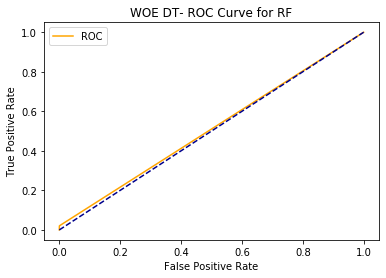

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('WOE DT- ROC Curve for RF')
plt.legend()
plt.show()

In [7]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)   

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2782 68 394 89
pod:  0.18426501035196688
pof:  0.023859649122807018
AUC:  0.58020268061458


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

2850 0 483 0
pod:  0.0
pof:  0.0
AUC:  0.5


In [6]:
#FNN
def get_FNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras.layers import Dense
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X2_train.shape[1]
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using mse as a measure of model performance
    #model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    from keras.callbacks import EarlyStopping
    #set early stopping monitor so the model stops training when it won't improve anymore
    early_stopping_monitor = EarlyStopping(patience=3)
    #train model
    model.fit(X2_train, y2_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    y2_pred = model.predict(X2_test)
    print('y2_pred: ',y2_pred)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_FNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2399 samples, validate on 600 samples
Epoch 1/30
2399/2399 [==============================] - 0s 196us/step - loss: 2.2647 - acc: 0.8504 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 2/30
2399/2399 [==============================] - 0s 63us/step - loss: 2.2776 - acc: 0.8587 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 3/30
2399/2399 [==============================] - 0s 59us/step - loss: 2.2776 - acc: 0.8587 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 4/30
2399/2399 [==============================] - 0s 60us/step - loss: 2.2776 - acc: 0.8587 - val_loss: 2.5520 - val_acc: 0.8417
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


Train on 2399 samples, validate on 600 samples
Epoch 1/30
2399/2399 [==============================] - 1s 249us/step - loss: 2.4325 - acc: 0.8487 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 2/30
2399/2399 [==============================] - 0s 65us/step - loss: 2.2776 - acc: 0.8587 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 3/30
2399/2399 [==============================] - 0s 60us/step - loss: 2.2776 - acc: 0.8587 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 4/30
2399/2399 [==============================] - 0s 61us/step - loss: 2.2776 - acc: 0.8587 - val_loss: 2.5520 - val_acc: 0.8417
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 1s 293us/step - loss: 2.4556 - acc: 0.8475 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 2/30
2400/2400 [==============================] - 0s 59us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 3/30
2400/2400 [==============================] - 0s 59us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 4/30
2400/2400 [==============================] - 0s 74us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.5520 - val_acc: 0.8417
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 1s 324us/step - loss: 2.5763 - acc: 0.8367 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 2/30
2400/2400 [==============================] - 0s 63us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 3/30
2400/2400 [==============================] - 0s 61us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.5520 - val_acc: 0.8417
Epoch 4/30
2400/2400 [==============================] - 0s 57us/step - loss: 2.2834 - acc: 0.8583 - val_loss: 2.5520 - val_acc: 0.8417
y2_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


 [0.06030071]]
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [

Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 1s 408us/step - loss: 13.5807 - acc: 0.1471 - val_loss: 13.1259 - val_acc: 0.1767
Epoch 2/30
2400/2400 [==============================] - 0s 65us/step - loss: 13.7569 - acc: 0.1371 - val_loss: 13.1259 - val_acc: 0.1767
Epoch 3/30
2400/2400 [==============================] - 0s 61us/step - loss: 13.7569 - acc: 0.1371 - val_loss: 13.1259 - val_acc: 0.1767
Epoch 4/30
2400/2400 [==============================] - 0s 68us/step - loss: 13.7569 - acc: 0.1371 - val_loss: 13.1259 - val_acc: 0.1767
y2_pred:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [7]:
#RNN
def get_RNN_Predict(X2_train, X2_test, y2_train, y2_test):
    import pandas as pd
    from keras.models import Sequential
    from keras.layers import Dense,Dropout, LSTM, GRU
    from keras.layers import Embedding
    max_features = 10000 # number of words to consider as features
    import numpy as np
    #create model 
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_RNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)

Train on 2399 samples, validate on 600 samples
Epoch 1/5
2399/2399 [==============================] - 2s 701us/step - loss: 0.5286 - acc: 0.8504 - val_loss: 0.4347 - val_acc: 0.8417
Epoch 2/5
2399/2399 [==============================] - 0s 95us/step - loss: 0.4019 - acc: 0.8587 - val_loss: 0.4354 - val_acc: 0.8417
Epoch 3/5
2399/2399 [==============================] - 0s 96us/step - loss: 0.3913 - acc: 0.8587 - val_loss: 0.4251 - val_acc: 0.8417
Epoch 4/5
2399/2399 [==============================] - 0s 99us/step - loss: 0.3749 - acc: 0.8587 - val_loss: 0.4259 - val_acc: 0.8417
Epoch 5/5
2399/2399 [==============================] - 0s 98us/step - loss: 0.3610 - acc: 0.8587 - val_loss: 0.4284 - val_acc: 0.8417
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 2s 809us/step - loss: 0.5333 - acc: 0.8300 - val_loss: 0.4340 - val_acc: 0.8417
Epoch 2/5
2400/2400 [==============================] - 0s 95us/step - loss: 0.4026 - acc: 0.8583 - val_loss: 0.4340 - val_acc: 0.8417
Epoch 3/5
2400/2400 [==============================] - 0s 91us/step - loss: 0.3952 - acc: 0.8583 - val_loss: 0.4572 - val_acc: 0.8417
Epoch 4/5
2400/2400 [==============================] - 0s 92us/step - loss: 0.3855 - acc: 0.8583 - val_loss: 0.4204 - val_acc: 0.8417
Epoch 5/5
2400/2400 [==============================] - 0s 93us/step - loss: 0.3694 - acc: 0.8583 - val_loss: 0.4283 - val_acc: 0.8417
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 2s 1ms/step - loss: 0.5544 - acc: 0.8542 - val_loss: 0.4349 - val_acc: 0.8417
Epoch 2/5
2400/2400 [==============================] - 0s 100us/step - loss: 0.4036 - acc: 0.8583 - val_loss: 0.4353 - val_acc: 0.8417
Epoch 3/5
2400/2400 [==============================] - 0s 97us/step - loss: 0.3967 - acc: 0.8583 - val_loss: 0.4294 - val_acc: 0.8417
Epoch 4/5
2400/2400 [==============================] - 0s 102us/step - loss: 0.3900 - acc: 0.8583 - val_loss: 0.4353 - val_acc: 0.8417
Epoch 5/5
2400/2400 [==============================] - 0s 97us/step - loss: 0.3763 - acc: 0.8583 - val_loss: 0.4534 - val_acc: 0.8417
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 3s 1ms/step - loss: 0.5223 - acc: 0.8525 - val_loss: 0.4766 - val_acc: 0.8233
Epoch 2/5
2400/2400 [==============================] - 0s 102us/step - loss: 0.3956 - acc: 0.8629 - val_loss: 0.4807 - val_acc: 0.8233
Epoch 3/5
2400/2400 [==============================] - 0s 102us/step - loss: 0.3894 - acc: 0.8629 - val_loss: 0.4751 - val_acc: 0.8233
Epoch 4/5
2400/2400 [==============================] - 0s 100us/step - loss: 0.3801 - acc: 0.8629 - val_loss: 0.4586 - val_acc: 0.8233
Epoch 5/5
2400/2400 [==============================] - 0s 99us/step - loss: 0.3681 - acc: 0.8629 - val_loss: 0.4951 - val_acc: 0.8233
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


In [11]:
#CNN - 1D CNN
def get_CNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras import layers
    from keras.optimizers import RMSprop
    max_features = 10000 # number of words to consider as features
    
    model = Sequential()
    #model.add(layers.Embedding(max_features, 128, input_length=96))
    model.add(layers.Embedding(max_features, 128, input_length=19))
    model.add(layers.Conv1D(32, 2, activation='relu'))
    model.add(layers.MaxPooling1D(5))
    model.add(layers.Conv1D(32, 2, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    y22_pred[y22_pred ==2.0]=1
   # y22_pred=y22_pred[y22_pred > 1.0]=1
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_CNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 19, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 18, 32)            8224      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 32)             2080      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 33        
Total params: 1,290,337
Trainable params: 1,290,337
Non-trainable params: 0
__________________________________________

Train on 2399 samples, validate on 600 samples
Epoch 1/5
2399/2399 [==============================] - 5s 2ms/step - loss: 0.4111 - acc: 0.8587 - val_loss: 0.4453 - val_acc: 0.8417
Epoch 2/5
2399/2399 [==============================] - 1s 332us/step - loss: 0.3998 - acc: 0.8587 - val_loss: 0.4431 - val_acc: 0.8417
Epoch 3/5
2399/2399 [==============================] - 1s 300us/step - loss: 0.3944 - acc: 0.8587 - val_loss: 0.4423 - val_acc: 0.8417
Epoch 4/5
2399/2399 [==============================] - 1s 313us/step - loss: 0.3894 - acc: 0.8587 - val_loss: 0.4416 - val_acc: 0.8417
Epoch 5/5
2399/2399 [==============================] - 1s 300us/step - loss: 0.3846 - acc: 0.8587 - val_loss: 0.4420 - val_acc: 0.8417
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

y22_pred:  [[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 4s 2ms/step - loss: 1.4420 - acc: 0.8629 - val_loss: 0.7332 - val_acc: 0.8233
Epoch 2/5
2400/2400 [==============================] - 1s 326us/step - loss: 0.5720 - acc: 0.8629 - val_loss: 0.6247 - val_acc: 0.8233
Epoch 3/5
2400/2400 [==============================] - 1s 321us/step - loss: 0.4756 - acc: 0.8629 - val_loss: 0.5639 - val_acc: 0.8233
Epoch 4/5
2400/2400 [==============================] - 1s 326us/step - loss: 0.4343 - acc: 0.8629 - val_loss: 0.5318 - val_acc: 0.8233
Epoch 5/5
2400/2400 [==============================] - 1s 332us/step - loss: 0.4123 - acc: 0.8629 - val_loss: 0.5075 - val_acc: 0.8233
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]

In [4]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

2720 130 133 350
pod:  0.7246376811594203
pof:  0.0456140350877193
AUC:  0.8395118230358506


In [5]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

2810 40 128 355
pod:  0.7349896480331263
pof:  0.014035087719298246
AUC:  0.860477280156914
accuracy:  0.9495949594959496
